In [9]:
import pandas as pd
df=pd.read_csv(r'C:\Users\NehaSinghParihar\Downloads\ab_test_job_application.csv')

In [10]:
print(df.head())


   user_id group  step_1_started  step_2_started  step_3_started  \
0     1001     A             1.0               1               1   
1     1002     B             1.0               1               1   
2     1003     B             1.0               1               0   
3     1004     B             1.0               1               1   
4     1005     A             1.0               1               1   

   application_completed            timestamp  
0                      1  2025-03-01 00:00:00  
1                      1  2025-03-01 00:01:00  
2                      0  2025-03-01 00:02:00  
3                      0  2025-03-01 00:03:00  
4                      0  2025-03-01 00:04:00  


In [12]:
print(df.isnull().sum())

user_id                  0
group                    0
step_1_started           0
step_2_started           0
step_3_started           0
application_completed    0
timestamp                0
dtype: int64


In [13]:
print(df['group'].value_counts())

group
A    2500
B    2500
Name: count, dtype: int64


In [18]:
conversion_rates=df.groupby('group')['application_completed'].mean()
print(conversion_rates)

group
A    0.3408
B    0.3388
Name: application_completed, dtype: float64


In [19]:
from scipy.stats import chi2_contingency

In [33]:
contingency_table=pd.crosstab(df['group'],df['application_completed'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'chi-square: {chi2}, p-value: {p}')

if p < 0.05:
    print('The new UI improves the conversion rate')

else:
    print('The new UI does not improve the conversion rate')

chi-square: 0.01426432035238577, p-value: 0.9049320566204968
The new UI does not improve the conversion rate


## Conversion Rate by Group

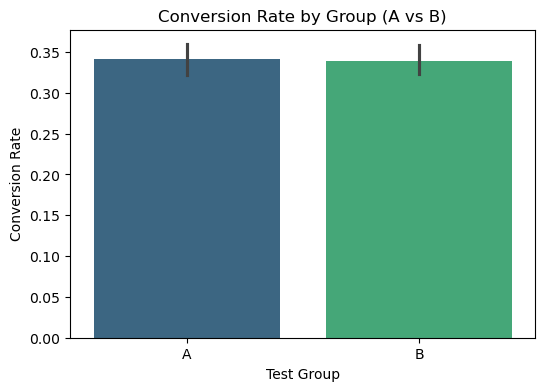

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=df['group'], y=df['application_completed'], hue=df['group'], palette = 'viridis', legend= False)
plt.title('Conversion Rate by Group (A vs B)')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

## Funnel Drop-Off Analysis

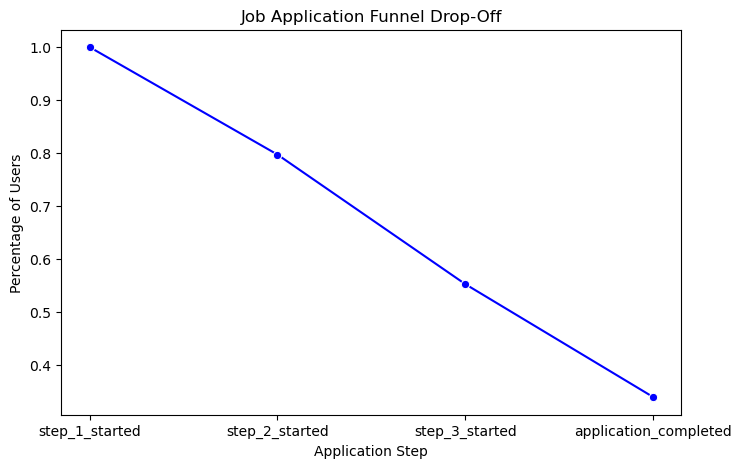

In [69]:
steps = ['step_1_started', 'step_2_started', 'step_3_started', 'application_completed']
step_means = df[steps].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=steps, y=step_means, marker='o', color='blue')
plt.title('Job Application Funnel Drop-Off')
plt.xlabel('Application Step')
plt.ylabel('Percentage of Users')
plt.show()
